In [1]:
import pandas as pd

## 1. Wczytanie danych, przegląd i sprawdzenie wartości brakujących

In [2]:
data = pd.read_csv('../data/raw/merged_data.csv')

C:\Users\Marcin\AppData\Local\Temp\ipykernel_3816\489699962.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/merged_data.csv')


In [3]:
data.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Suma dobowa opadów [mm],Status pomiaru SMDB,Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,...,Status pomiaru HSS,Gatunek śniegu[kod],Status pomiaru GATS,Rodzaj pokrywy śnieżnej [kod],Status pomiaru RPSN,Rzeka,Wysokość n.p.m.,geometry,Województwo,date
0,249210010,PILZNO,2001,1,3,12.6,NaN,W,0,8.0,...,8.0,NaN,8.0,NaN,8.0,Wisłoka,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2001-01-03
1,249210010,PILZNO,2001,1,7,1.2,NaN,W,0,8.0,...,8.0,NaN,8.0,NaN,8.0,Wisłoka,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2001-01-07
2,249210010,PILZNO,2001,1,8,15.4,NaN,W,0,8.0,...,8.0,NaN,8.0,NaN,8.0,Wisłoka,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2001-01-08
3,249210010,PILZNO,2001,1,9,8.2,NaN,S,0,8.0,...,8.0,NaN,8.0,NaN,8.0,Wisłoka,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2001-01-09
4,249210010,PILZNO,2001,1,11,1.7,NaN,S,0,8.0,...,8.0,NaN,8.0,NaN,8.0,Wisłoka,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2001-01-11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179871 entries, 0 to 179870
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Kod stacji                           179871 non-null  int64  
 1   Nazwa stacji                         179871 non-null  object 
 2   Rok                                  179871 non-null  int64  
 3   Miesiąc                              179871 non-null  int64  
 4   Dzień                                179871 non-null  int64  
 5   Suma dobowa opadów [mm]              179871 non-null  float64
 6   Status pomiaru SMDB                  10413 non-null   float64
 7   Rodzaj opadu [S/W/ ]                 169464 non-null  object 
 8   Wysokość pokrywy śnieżnej [cm]       179871 non-null  int64  
 9   Status pomiaru PKSN                  158602 non-null  float64
 10  Wysokość świeżospałego śniegu [cm]   179871 non-null  int64  
 11  Status pomiar

In [5]:
(1 - data.count() / data.count()['Kod stacji']) * 100

Kod stacji                              0.000000
Nazwa stacji                            0.000000
Rok                                     0.000000
Miesiąc                                 0.000000
Dzień                                   0.000000
Suma dobowa opadów [mm]                 0.000000
Status pomiaru SMDB                    94.210851
Rodzaj opadu [S/W/ ]                    5.785813
Wysokość pokrywy śnieżnej [cm]          0.000000
Status pomiaru PKSN                    11.824585
Wysokość świeżospałego śniegu [cm]      0.000000
Status pomiaru HSS                      7.058948
Gatunek śniegu[kod]                    88.097581
Status pomiaru GATS                    12.198742
Rodzaj pokrywy śnieżnej [kod]          74.637935
Status pomiaru RPSN                    37.003186
Rzeka                                   0.000000
Wysokość n.p.m.                         0.000000
geometry                                0.000000
Województwo                             0.000000
date                

In [6]:
data.columns

Index(['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Dzień',
       'Suma dobowa opadów [mm]', 'Status pomiaru SMDB',
       'Rodzaj opadu [S/W/ ] ', 'Wysokość pokrywy śnieżnej [cm] ',
       'Status pomiaru PKSN', 'Wysokość świeżospałego śniegu [cm] ',
       'Status pomiaru HSS ', 'Gatunek śniegu[kod]', 'Status pomiaru GATS',
       'Rodzaj pokrywy śnieżnej [kod]', 'Status pomiaru RPSN', 'Rzeka',
       'Wysokość n.p.m.', 'geometry', 'Województwo', 'date'],
      dtype='object')

Ze względu na duże ilości brakujących wartości oraz niewielki wpływ w kontekście dalszych analiz, usunięte zostają kolumny dotyczące statusu pomiaru. Również rodzaj pokrywy śnieżnej, jak i rzeka mają niewielki wpływ w kontekście dalszych analiz, więc zostaną usunięte. Pomimo, że w tym projekcie najważniejszą kolumną bedzie "Suma dobowa opadów [mm]", reszta kolumn zostanie w ramce, gdyż może być przydatna, na przykład przy tworzeniu jakichś modeli.

In [7]:
data = data.drop(['Status pomiaru SMDB', 'Status pomiaru PKSN', 'Status pomiaru HSS ', 'Gatunek śniegu[kod]', 
                  'Status pomiaru GATS','Rodzaj pokrywy śnieżnej [kod]', 'Status pomiaru RPSN', 'Rzeka'], axis=1)

In [8]:
data.columns

Index(['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Dzień',
       'Suma dobowa opadów [mm]', 'Rodzaj opadu [S/W/ ] ',
       'Wysokość pokrywy śnieżnej [cm] ',
       'Wysokość świeżospałego śniegu [cm] ', 'Wysokość n.p.m.', 'geometry',
       'Województwo', 'date'],
      dtype='object')

In [9]:
(1 - data.count() / data.count()['Kod stacji']) * 100

Kod stacji                             0.000000
Nazwa stacji                           0.000000
Rok                                    0.000000
Miesiąc                                0.000000
Dzień                                  0.000000
Suma dobowa opadów [mm]                0.000000
Rodzaj opadu [S/W/ ]                   5.785813
Wysokość pokrywy śnieżnej [cm]         0.000000
Wysokość świeżospałego śniegu [cm]     0.000000
Wysokość n.p.m.                        0.000000
geometry                               0.000000
Województwo                            0.000000
date                                   0.000000
dtype: float64

Brak rodzaju opadu oznacza, że tego opadu nie było - z tego względu zostanie on zastąpiony wartością "brak", a następnie kolumna ta zostanie poddana procesowi encodingu, aby zamienić jej wartości na binarne True/False.

In [10]:
data[pd.isnull(data['Rodzaj opadu [S/W/ ] ']) == True]

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Wysokość świeżospałego śniegu [cm],Wysokość n.p.m.,geometry,Województwo,date
5973,249210010,PILZNO,2011,1,1,0.0,NaN,3,0,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2011-01-01
5976,249210010,PILZNO,2011,1,4,0.0,NaN,5,2,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2011-01-04
5977,249210010,PILZNO,2011,1,5,0.0,NaN,5,0,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2011-01-05
5996,249210010,PILZNO,2011,1,28,0.0,NaN,2,0,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2011-01-28
5997,249210010,PILZNO,2011,1,29,0.0,NaN,2,0,195,POINT (21.308333333333334 49.98722222222222),podkarpackie,2011-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128062,250210240,ZAWADA,2022,12,13,0.0,NaN,25,5,200,POINT (21.493333333333336 50.06388888888888),podkarpackie,2022-12-13
128067,250210240,ZAWADA,2022,12,18,0.0,NaN,23,3,200,POINT (21.493333333333336 50.06388888888888),podkarpackie,2022-12-18
128068,250210240,ZAWADA,2022,12,19,0.0,NaN,19,0,200,POINT (21.493333333333336 50.06388888888888),podkarpackie,2022-12-19
128069,250210240,ZAWADA,2022,12,20,0.0,NaN,17,0,200,POINT (21.493333333333336 50.06388888888888),podkarpackie,2022-12-20


In [11]:
data[data['Suma dobowa opadów [mm]'] == 0]

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Wysokość świeżospałego śniegu [cm],Wysokość n.p.m.,geometry,Województwo,date
34,249210080,JASŁO,2001,1,23,0.0,S,0,0,228,POINT (21.485 49.73555555555556),podkarpackie,2001-01-23
35,249210080,JASŁO,2001,1,24,0.0,W,0,0,228,POINT (21.485 49.73555555555556),podkarpackie,2001-01-24
65,249210160,ORZECHÓWKA,2001,1,23,0.0,S,0,0,310,POINT (21.961388888888887 49.71666666666667),podkarpackie,2001-01-23
76,249210180,KREMPNA,2001,1,11,0.0,S,0,0,380,POINT (21.489444444444445 49.51583333333333),podkarpackie,2001-01-11
82,249210180,KREMPNA,2001,1,27,0.0,W,0,0,380,POINT (21.489444444444445 49.51583333333333),podkarpackie,2001-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179803,250230130,FUTORY,2000,6,28,0.0,W,0,0,239,POINT (23.04638888888889 50.196666666666665),podkarpackie,2000-06-28
179825,250230130,FUTORY,2000,8,5,0.0,W,0,0,239,POINT (23.04638888888889 50.196666666666665),podkarpackie,2000-08-05
179838,250230130,FUTORY,2000,9,14,0.0,W,0,0,239,POINT (23.04638888888889 50.196666666666665),podkarpackie,2000-09-14
179859,250230130,FUTORY,2000,12,13,0.0,W,0,0,239,POINT (23.04638888888889 50.196666666666665),podkarpackie,2000-12-13


In [12]:
data['Rodzaj opadu [S/W/ ] '].fillna('brak', inplace=True)

In [13]:
data['Rodzaj opadu [S/W/ ] '].unique()

array(['W', 'S', 'brak'], dtype=object)

In [14]:
# checking null values
(1 - data.count() / data.count()['Kod stacji']) * 100

Kod stacji                             0.0
Nazwa stacji                           0.0
Rok                                    0.0
Miesiąc                                0.0
Dzień                                  0.0
Suma dobowa opadów [mm]                0.0
Rodzaj opadu [S/W/ ]                   0.0
Wysokość pokrywy śnieżnej [cm]         0.0
Wysokość świeżospałego śniegu [cm]     0.0
Wysokość n.p.m.                        0.0
geometry                               0.0
Województwo                            0.0
date                                   0.0
dtype: float64

In [15]:
data = pd.get_dummies(data, drop_first=True, columns=['Rodzaj opadu [S/W/ ] '])

In [16]:
import matplotlib.pyplot as plt

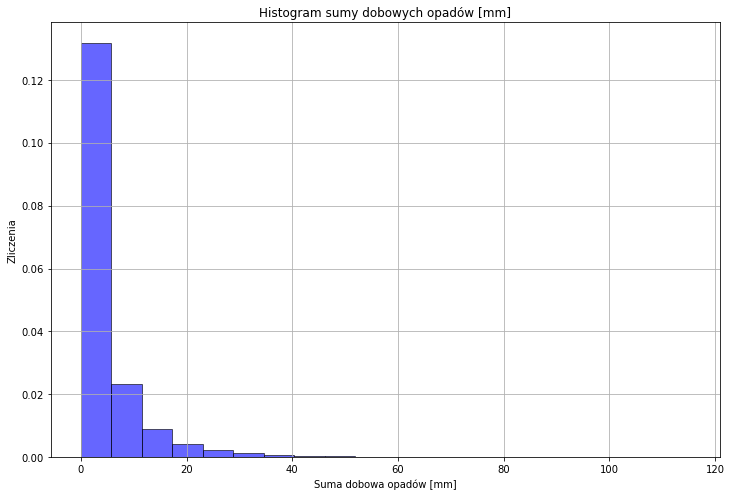

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.hist(data['Suma dobowa opadów [mm]'], bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
ax.set_title('Histogram sumy dobowych opadów [mm]')
ax.set_xlabel('Suma dobowa opadów [mm]')
ax.set_ylabel('Zliczenia')
ax.grid()
plt.savefig('../images/histogram.png')

Aby zmienić dystrybucję rozkładu zmiennej "Suma dobowa opadów [mm]" zostanie wykonana transformacja Box-Cox. Aby uniknąć problemu z obsługą danych z wartością 0, zostanie dodana do nich wartość 1e-6, która nie przekłamuje danych, gdyż jej znaczenie jest niewielkie, a pozwala obsłużyć wszystkie wartości.

In [18]:
from scipy import stats

In [19]:
data['Suma dobowa opadów [mm]_boxcox'], lambda_ = stats.boxcox(data['Suma dobowa opadów [mm]'] + 1e-6)

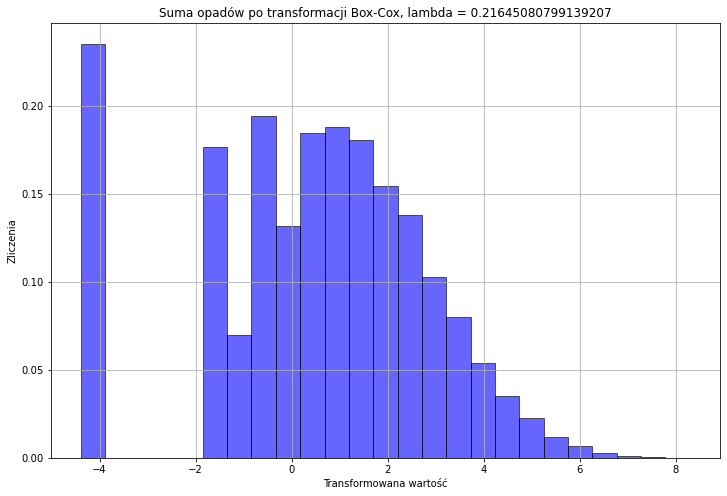

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.hist(data['Suma dobowa opadów [mm]_boxcox'], bins=25, density=True, alpha=0.6, color='b', edgecolor='black')
ax.set_title(f'Suma opadów po transformacji Box-Cox, lambda = {lambda_}')
ax.set_xlabel('Transformowana wartość')
ax.set_ylabel('Zliczenia')
ax.grid()
plt.savefig('../images/box-cox_histogram.png')